# Import libraries

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import json
import time

# Read video and json file

In [2]:
PATH_INPUT_VIDEO_1  = '/content/input.mkv'
PATH_BOXES_VIDEO_1 = '/content/initial_conditions.json' 

In [3]:
f = open(PATH_BOXES_VIDEO_1)  
boxes_video1 = json.load(f)

cap = cv2.VideoCapture(PATH_INPUT_VIDEO_1)

# See objects to track

In [4]:
_, frame = cap.read()

In [6]:
for bb in tuple(boxes_video1):
  bbox = bb['coordinates']
  p1 = (int(bbox[0]), int(bbox[1]))
  p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
  cv2.rectangle(frame, p1, p2, (0, 255, 0), 3)

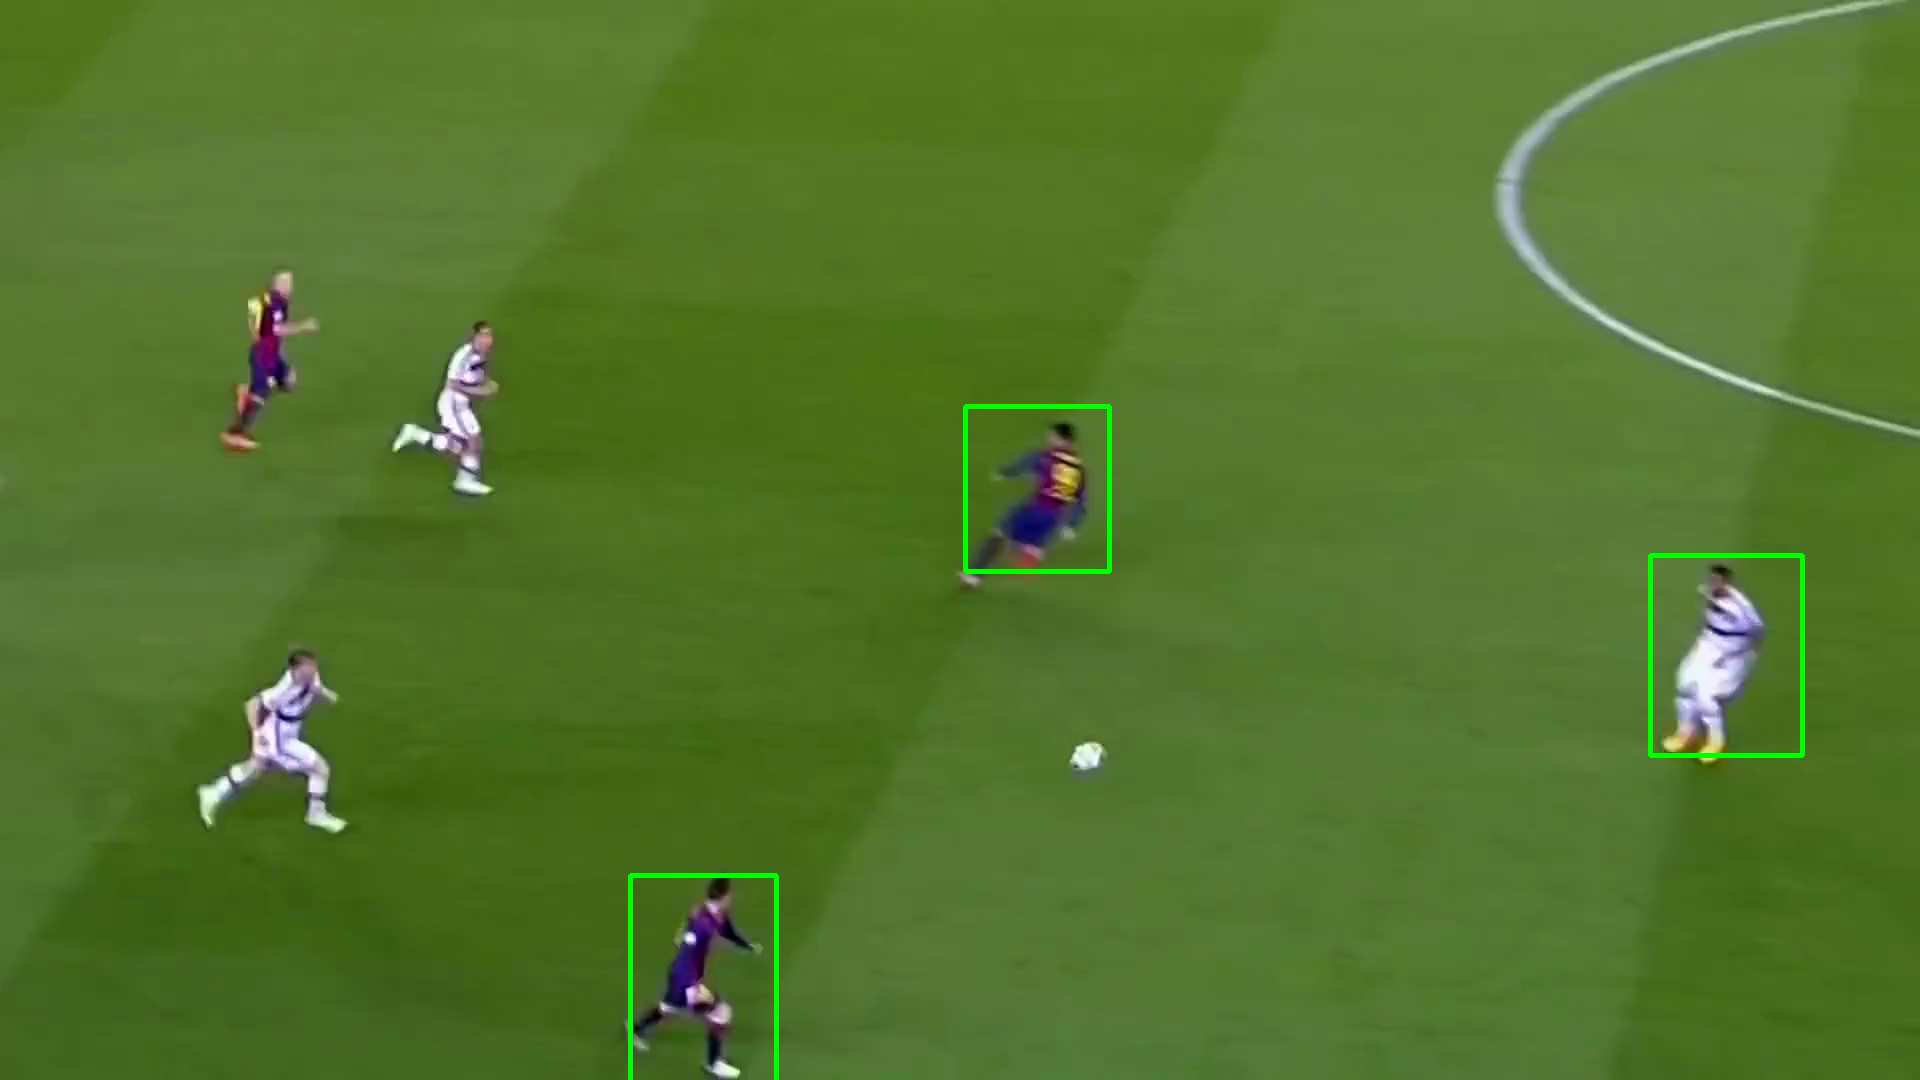

In [7]:
cv2_imshow(frame)

In [8]:
#from multi_object_tracker import specific_player_tracking

# Define algorithms for tracking

In [9]:
OPENCV_OBJECT_TRACKERS = {
	"CSRT": cv2.TrackerCSRT_create,
	"KCF": cv2.TrackerKCF_create,
	"MEDIANFLOW": cv2.TrackerMedianFlow_create,
	"MOSSE": cv2.TrackerMOSSE_create
}

In [10]:
def experiments_track(PATH_INPUT ,
                      PATH_OUTPUT,
                      BOXES,
                      TYPE_TRACKER,
                      OPENCV_OBJECT_TRACKERS):
  

  cap = cv2.VideoCapture(PATH_INPUT )
  # Definimos ancho y alto
  W = int(cap .get(cv2.CAP_PROP_FRAME_WIDTH))
  H = int(cap .get(cv2.CAP_PROP_FRAME_HEIGHT))

  tracker_type = TYPE_TRACKER

  fourcc = cv2.VideoWriter_fourcc(*'MP4V')
  out = cv2.VideoWriter(PATH_OUTPUT, fourcc, 20.0, (W, H), True)

  trackers = cv2.MultiTracker_create()

  ok, frame = cap.read()

  for bb in tuple(BOXES):
    trackers.add( OPENCV_OBJECT_TRACKERS[tracker_type](),frame,tuple(bb['coordinates']))

  total=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  #Read until video is completed
  while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:

      # Start timer
      timer = cv2.getTickCount()

      # Update tracker
      ok, boxes = trackers.update(frame)

      # Calculate Frames per second (FPS)
      fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

      # Draw bounding box
      if ok:
        for bbox in boxes:
          # Tracking success
          p1 = (int(bbox[0]), int(bbox[1]))
          p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
          cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

      else :
        # Tracking failure
        cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

      # Display tracker type on frame
      cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2)
      # Display FPS on frame
      cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2)


      out.write(frame)
    # Break the loop
    else: 
      break

    # When everything done, release the video capture object
  cap.release()
  out.release()

# Run multiple tracking algorithms

In [11]:
list_trackers = ["CSRT","KCF","MEDIANFLOW","MOSSE"]

In [12]:
for tracker in list_trackers:

  PATH_OUTPUT = f'/content/output_{tracker}.mp4'

  start = time.time()
  experiments_track(PATH_INPUT_VIDEO_1 ,PATH_BOXES_VIDEO_1,boxes_video1,tracker ,OPENCV_OBJECT_TRACKERS)
  stop = time.time()

  duration = (stop-start)/60

  print(f'Execution time of {tracker} method is: {duration}')

Execution time of CSRT method is: 0.9190237840016683
Execution time of KCF method is: 0.44346980651219686
Execution time of MEDIANFLOW method is: 0.2337123155593872
Execution time of MOSSE method is: 0.08877798318862914


# Compare CSRT and KFC in another video

In [13]:
PATH_INPUT_VIDEO_2  = '/content/input2.mp4'
PATH_BOXES_VIDEO_2 = '/content/initial_conditions2.json' 

In [14]:
cap = cv2.VideoCapture(PATH_INPUT_VIDEO_2)
_, frame = cap.read()
f = open(PATH_BOXES_VIDEO_2)  
boxes_video2 = json.load(f)

In [15]:
frame.shape

(720, 1280, 3)

# See objects to track for example 2

In [16]:
boxes_video2

[{'coordinates': [950, 500, 62, 114], 'id': 0, 'object': 'player'},
 {'coordinates': [610, 268, 40, 88], 'id': 2, 'object': 'player'}]

In [17]:
for bb in boxes_video2:
  bbox = bb['coordinates']
  p1 = (int(bbox[0]), int(bbox[1]))
  p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
  cv2.rectangle(frame, p1, p2, (0, 255, 0), 3)

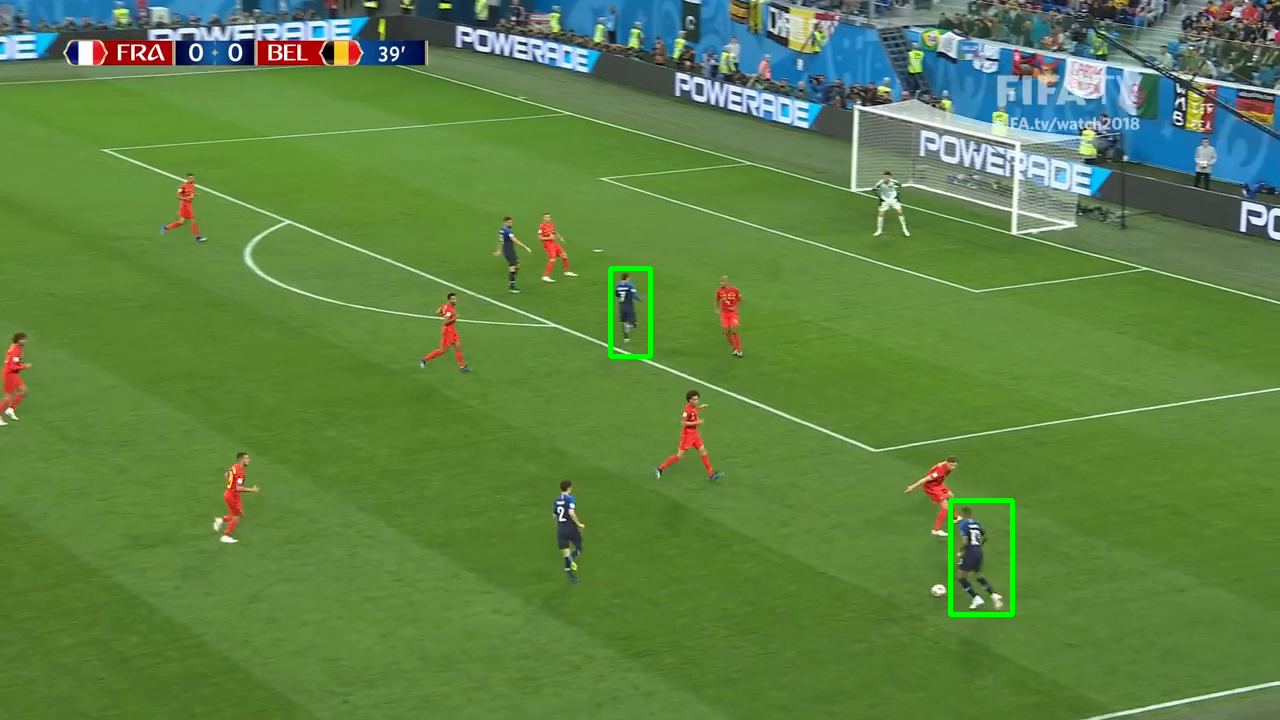

In [18]:
cv2_imshow(frame)

In [19]:
list_trackers = ["CSRT","KCF"]

In [20]:
 for tracker in list_trackers:

  PATH_OUTPUT = f'/content/output2_{tracker}.mp4'

  start = time.time()
  experiments_track(PATH_INPUT_VIDEO_2 ,PATH_OUTPUT,boxes_video2,tracker ,OPENCV_OBJECT_TRACKERS)
  stop = time.time()

  duration = (stop-start)/60

  print(f'Execution time of {tracker} method is {duration}')

Execution time of CSRT method is 0.3077443281809489
Execution time of KCF method is 0.07375394900639852
